In [1]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
# System setup

# Change working directory to project folder
os.chdir('/content/drive/MyDrive/Earth-System-Modelling')

# Append project to path for easy imports
sys.path.append('/content/drive/MyDrive/Earth-System-Modelling')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import the model
# The model is stored in another file
# all functions are definded there...
from swbm_mini import prepro, predict_ts, model_correlation

# Now you have access to the functions:
# prepro() predict_ts() model_correlation()

# Read the data
data = pd.read_csv("data/Data_swbm_Sweden_new.csv")

# Prepare the data
data_prepro = prepro(data)

In [6]:
# Define initial parameters
config = {
    'c_s': 420,    # soil water holding capacity in mm
    'a': 4,        # runoff function shape α
    'g': 0.5,      # ET function shape γ
    'b0': 0.8      # maximum of ET function β
}


In [7]:
# Run the SWBM model
moisture, runoff, et_flux = predict_ts(data_prepro, config)

In [8]:
# Compute correlation over the whole timeseries
corrs = model_correlation(data_prepro, (moisture, runoff, et_flux))
print("Correlation between observed data and model outputs:\n")
print(f"Soil Moisture (sm):      {corrs['sm']:.3f}")
print(f"Runoff (ro):             {corrs['ro']:.3f}")
print(f"Evapotranspiration (et): {corrs['et']:.3f}")
print(f"\nSum of correlations:   {corrs['sum']:.3f}")

Correlation between observed data and model outputs:

Soil Moisture (sm):      -0.117
Runoff (ro):             0.056
Evapotranspiration (et): 0.855

Sum of correlations:   0.794


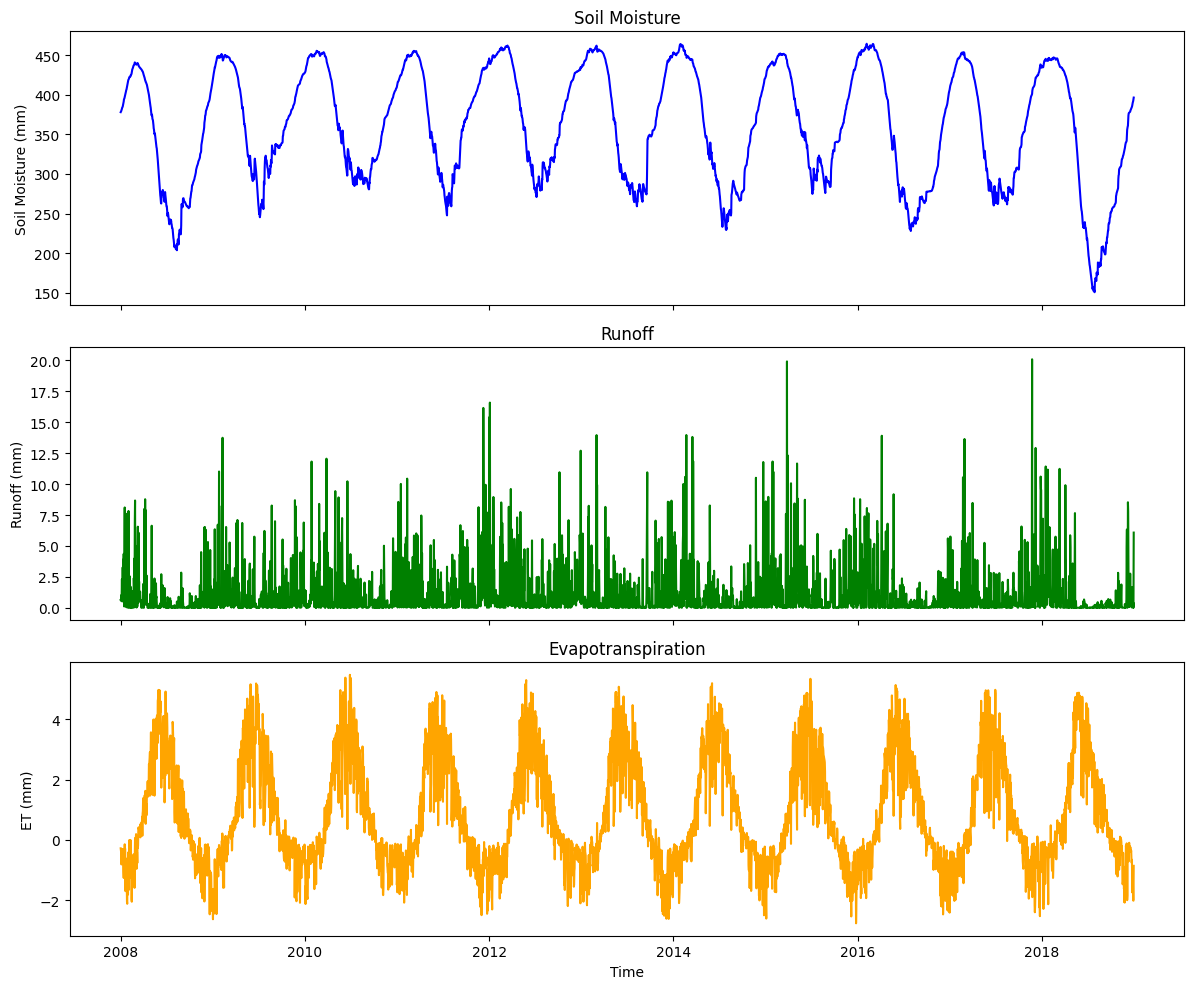

In [9]:
# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Soil moisture
axes[0].plot(data_prepro['time'], moisture, color='blue')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('Soil Moisture')

# Runoff
axes[1].plot(data_prepro['time'], runoff, color='green')
axes[1].set_ylabel('Runoff (mm)')
axes[1].set_title('Runoff')

# Evapotranspiration
axes[2].plot(data_prepro['time'], et_flux, color='orange')
axes[2].set_ylabel('ET (mm)')
axes[2].set_title('Evapotranspiration')
axes[2].set_xlabel('Time')

plt.tight_layout()
plt.show()

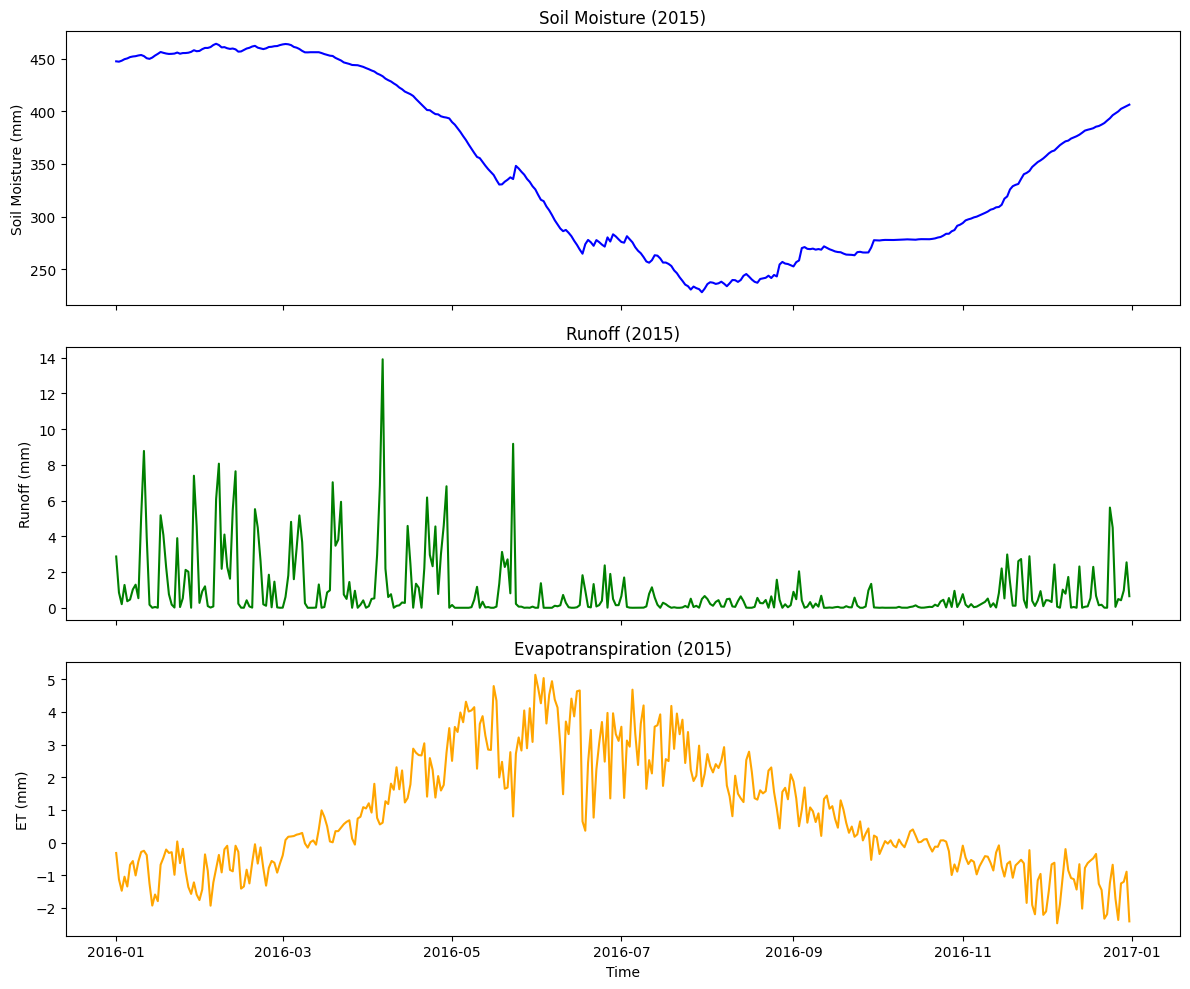

In [10]:
# Plot only one year
one_year = data_prepro[(data_prepro['time'] >= "2016-01-01") & (data_prepro['time'] <= "2016-12-31")]
moisture_year = moisture[one_year.index]
runoff_year = runoff[one_year.index]
et_flux_year = et_flux[one_year.index]
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
# Soil moisture
axes[0].plot(one_year['time'], moisture_year, color='blue')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('Soil Moisture (2015)')
# Runoff
axes[1].plot(one_year['time'], runoff_year, color='green')
axes[1].set_ylabel('Runoff (mm)')
axes[1].set_title('Runoff (2015)')
# Evapotranspiration
axes[2].plot(one_year['time'], et_flux_year, color='orange')
axes[2].set_ylabel('ET (mm)')
axes[2].set_title('Evapotranspiration (2015)')
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()

# Aufgabe
Variation von c_s


In [ ]:
c_s_values = np.arange(25, 826, 200) # Array an Zahlen, startet mit 100 in 50er Schritten bis 1000, unterschiedliche C_s Values definieren
results = []

for c_s_val in c_s_values:
    current_config = config.copy()  # Create a copy to avoid modifying the original config
    current_config['c_s'] = c_s_val

    # Run the SWBM model
    moisture, runoff, et_flux = predict_ts(data_prepro, current_config)

    # Compute correlation over the whole timeseries
    corrs = model_correlation(data_prepro, (moisture, runoff, et_flux))

    # Store results
    results.append({
        'c_s': c_s_val,
        'correlations': corrs,
        'model_outputs': {
            'time': data_prepro['time'],
            'moisture': moisture,
            'runoff': runoff,
            'et_flux': et_flux
        }
    })

print(f"Completed simulations for {len(c_s_values)} different c_s values.")
 # Displaying the first few results to confirm structure
print("First 2 results:")
for i in range(min(2, len(results))):
     print(results[i])

/content/drive/My Drive/Earth-System-Modelling/swbm_mini.py:33: RuntimeWarning: invalid value encountered in scalar power
  return b0 * (w_i / c_s) ** g


Completed simulations for 5 different c_s values.
First 2 results:
{'c_s': np.int64(25), 'correlations': {'sm': np.float64(nan), 'ro': np.float64(nan), 'et': np.float64(nan), 'sum': np.float64(nan)}, 'model_outputs': {'time': 0      2008-01-01
1      2008-01-02
2      2008-01-03
3      2008-01-04
4      2008-01-05
          ...    
4013   2018-12-27
4014   2018-12-28
4015   2018-12-29
4016   2018-12-30
4017   2018-12-31
Name: time, Length: 4018, dtype: datetime64[ns], 'moisture': array([22.5       , 22.86201894, 23.59504883, ...,         nan,
               nan,         nan]), 'runoff': array([0.00541588, 0.00174927, 0.01049979, ...,        nan,        nan,
              nan]), 'et_flux': array([-0.35918016, -0.7322779 , -0.21507739, ...,         nan,
               nan,         nan])}}
{'c_s': np.int64(225), 'correlations': {'sm': np.float64(0.8879083215750864), 'ro': np.float64(0.6294158605846749), 'et': np.float64(0.8674262937890144), 'sum': np.float64(2.384750475948776)}, 'model_ou

## Modelergebnisse für unterschiedliche c_s nebeneinander plotten




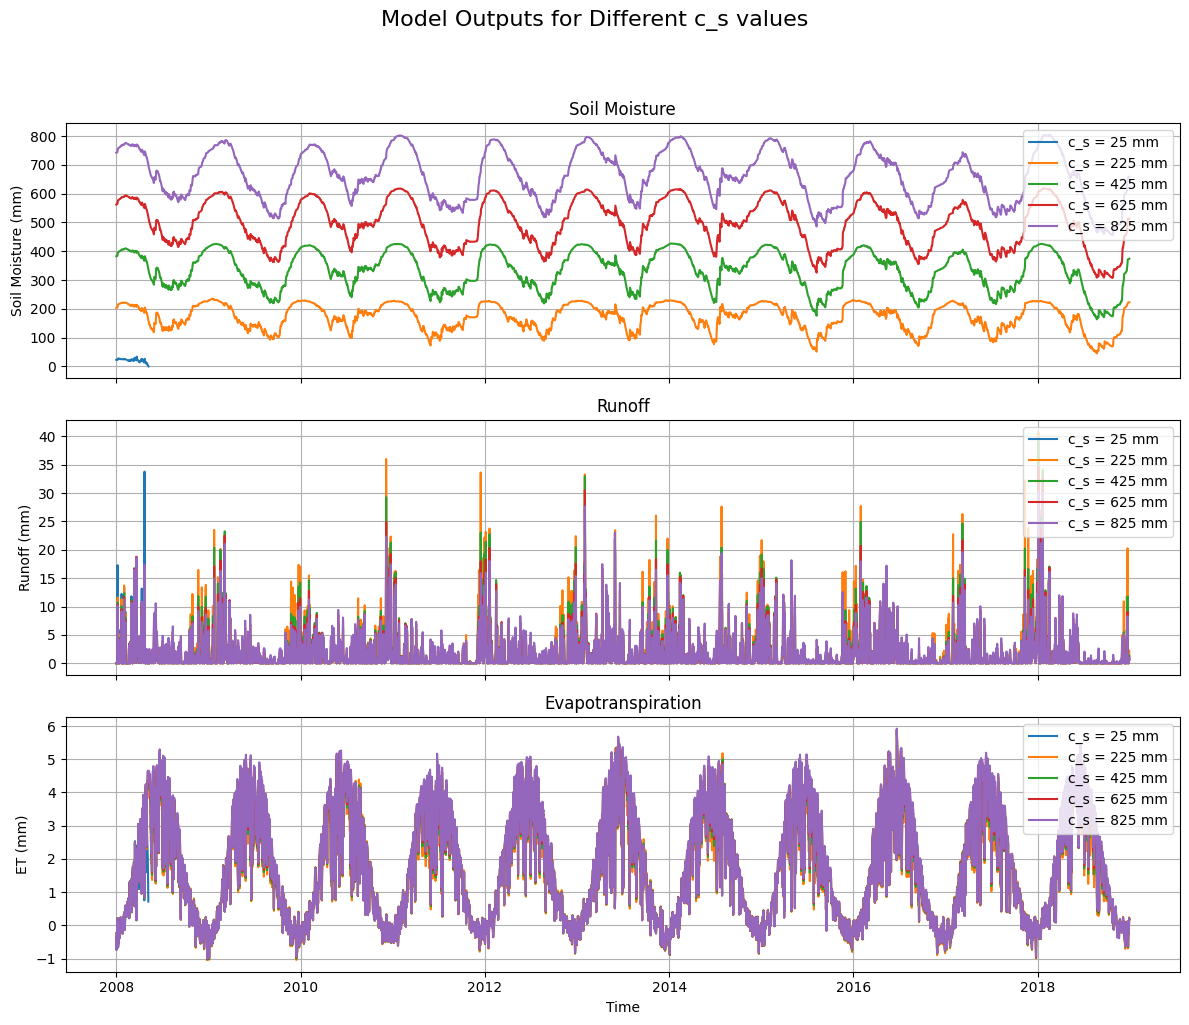

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Model Outputs for Different c_s values', fontsize=16, y=1.02)

# Iterate through results to plot each c_s value's time series on the same axes
for entry in results:
    c_s_val = entry['c_s']
    model_outputs = entry['model_outputs']

    time_series = pd.to_datetime(model_outputs['time'])
    moisture = model_outputs['moisture']
    runoff = model_outputs['runoff']
    et_flux = model_outputs['et_flux']

    # Plot Soil Moisture
    axes[0].plot(time_series, moisture, label=f'c_s = {c_s_val} mm')

    # Plot Runoff
    axes[1].plot(time_series, runoff, label=f'c_s = {c_s_val} mm')

    # Plot Evapotranspiration
    axes[2].plot(time_series, et_flux, label=f'c_s = {c_s_val} mm')

# Customize plots after all lines are added
# Soil Moisture
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('Soil Moisture')
axes[0].legend(loc='upper right')
axes[0].grid(True)

# Runoff
axes[1].set_ylabel('Runoff (mm)')
axes[1].set_title('Runoff')
axes[1].legend(loc='upper right')
axes[1].grid(True)

# Evapotranspiration
axes[2].set_ylabel('ET (mm)')
axes[2].set_title('Evapotranspiration')
axes[2].set_xlabel('Time')
axes[2].legend(loc='upper right')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

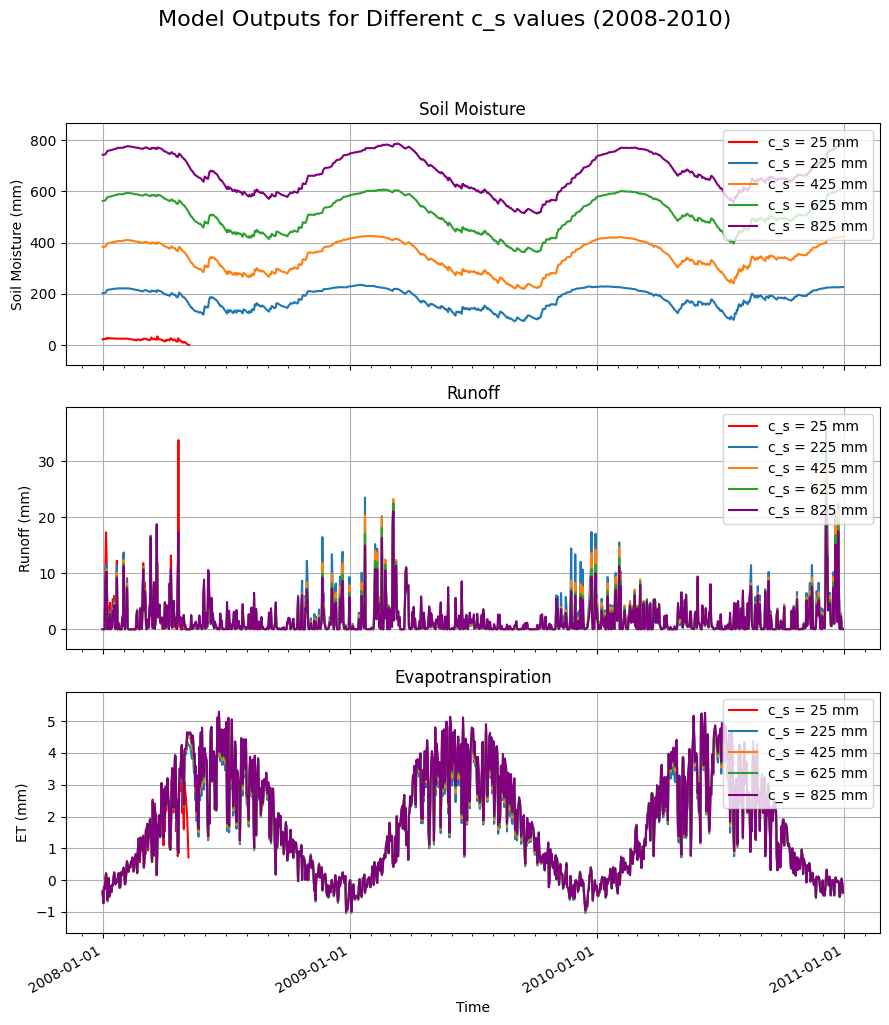

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # Import mdates for date formatting

fig, axes = plt.subplots(3, 1, figsize=(9, 10), sharex=True)
fig.suptitle('Model Outputs for Different c_s values (2008-2010)', fontsize=16, y=1.02)

# Define the 3-year period
start_date = "2008-01-01"
end_date = "2010-12-31"

# To determine y-axis limits, we can collect min/max values for each output
min_moisture = float('inf')
max_moisture = float('-inf')
min_runoff = float('inf')
max_runoff = float('-inf')
min_et_flux = float('inf')
max_et_flux = float('-inf')

for entry in results:
    c_s_val = entry['c_s']
    model_outputs = entry['model_outputs']

    time_series = pd.to_datetime(model_outputs['time'])

    # Filter for the 3-year period
    mask = (time_series >= start_date) & (time_series <= end_date)
    time_series_filtered = time_series[mask]
    moisture_filtered = model_outputs['moisture'][mask]
    runoff_filtered = model_outputs['runoff'][mask]
    et_flux_filtered = model_outputs['et_flux'][mask]

    # For min/max calculation, skip NaNs
    valid_moisture = moisture_filtered[~np.isnan(moisture_filtered)]
    valid_runoff = runoff_filtered[~np.isnan(runoff_filtered)]
    valid_et_flux = et_flux_filtered[~np.isnan(et_flux_filtered)]

    if len(valid_moisture) > 0:
        min_moisture = min(min_moisture, valid_moisture.min())
        max_moisture = max(max_moisture, valid_moisture.max())
    if len(valid_runoff) > 0:
        min_runoff = min(min_runoff, valid_runoff.min())
        max_runoff = max(max_runoff, valid_runoff.max())
    if len(valid_et_flux) > 0:
        min_et_flux = min(min_et_flux, valid_et_flux.min())
        max_et_flux = max(max_et_flux, valid_et_flux.max())

    # Determine color for the line
    line_color = None
    if c_s_val == 25:
        line_color = 'red'
    elif c_s_val == 825:
        line_color = 'purple'

    # Plot Soil Moisture
    axes[0].plot(time_series_filtered, moisture_filtered, label=f'c_s = {c_s_val} mm', color=line_color)

    # Plot Runoff
    axes[1].plot(time_series_filtered, runoff_filtered, label=f'c_s = {c_s_val} mm', color=line_color)

    # Plot Evapotranspiration
    axes[2].plot(time_series_filtered, et_flux_filtered, label=f'c_s = {c_s_val} mm', color=line_color)

# Customize plots after all lines are added
# Soil Moisture
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('Soil Moisture')
axes[0].legend(loc='upper right')
axes[0].grid(True)
if min_moisture != float('inf') and max_moisture != float('-inf'):
    # Add a buffer for better visualization, but ensure it's not too extreme for small values
    axes[0].set_ylim(min_moisture - (max_moisture - min_moisture) * 0.1, max_moisture + (max_moisture - min_moisture) * 0.1)

# Runoff
axes[1].set_ylabel('Runoff (mm)')
axes[1].set_title('Runoff')
axes[1].legend(loc='upper right')
axes[1].grid(True)
if min_runoff != float('inf') and max_runoff != float('-inf'):
    # Ensure 0 or negative values are visible
    axes[1].set_ylim(min(0, min_runoff - (max_runoff - min_runoff) * 0.1), max_runoff + (max_runoff - min_runoff) * 0.1)

# Evapotranspiration
axes[2].set_ylabel('ET (mm)')
axes[2].set_title('Evapotranspiration')
axes[2].set_xlabel('Time')
axes[2].legend(loc='upper right')
axes[2].grid(True)
if min_et_flux != float('inf') and max_et_flux != float('-inf'):
    # Explicitly ensure negative values are visible for ET
    axes[2].set_ylim(min(0, min_et_flux - (max_et_flux - min_et_flux) * 0.1), max_et_flux + (max_et_flux - min_et_flux) * 0.1)

# Apply date formatting to the x-axis
date_form = mdates.DateFormatter('%Y-%m-%d') # Format as YYYY-MM-DD
for ax in axes:
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.YearLocator()) # Major ticks at each year
    ax.xaxis.set_minor_locator(mdates.MonthLocator()) # Minor ticks at each month

fig.autofmt_xdate() # Automatically format the x-axis labels for better readability

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

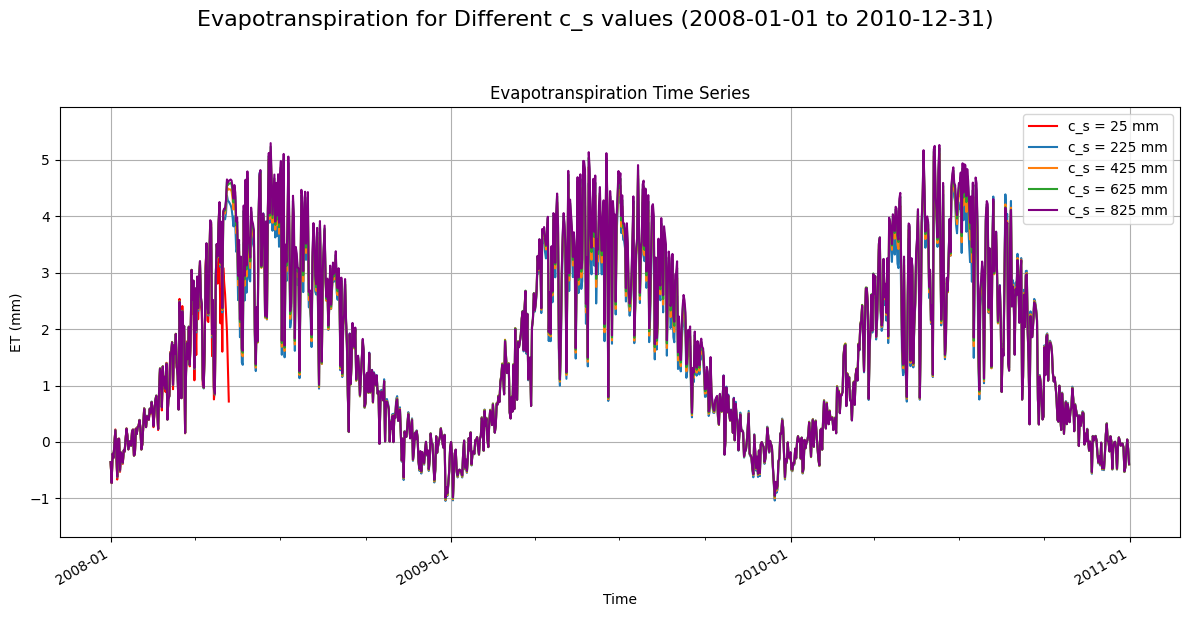

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Define the time period
start_date = "2008-01-01"
end_date = "2010-12-31"

# 1. Determine overall min/max ET for consistent y-axis across all lines
min_et_overall = float('inf')
max_et_overall = float('-inf')

for entry in results:
    model_outputs = entry['model_outputs']
    time_series = pd.to_datetime(model_outputs['time'])
    mask = (time_series >= start_date) & (time_series <= end_date)
    et_flux_filtered = model_outputs['et_flux'][mask]
    valid_et_flux = et_flux_filtered[~np.isnan(et_flux_filtered)]

    if len(valid_et_flux) > 0:
        min_et_overall = min(min_et_overall, valid_et_flux.min())
        max_et_overall = max(max_et_overall, valid_et_flux.max())

# Add a buffer to the y-axis limits for better visibility of peaks
if min_et_overall != float('inf') and max_et_overall != float('-inf'):
    y_buffer = (max_et_overall - min_et_overall) * 0.1
    min_et_overall -= y_buffer
    max_et_overall += y_buffer
else:
    min_et_overall = -5
    max_et_overall = 5 # Default range if no valid data

# 2. Setup a single subplot for all ET lines
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(f'Evapotranspiration for Different c_s values ({start_date} to {end_date})', fontsize=16, y=1.02)

# 3. Iterate and plot each c_s value's ET on the same axis
for entry in results:
    c_s_val = entry['c_s']
    model_outputs = entry['model_outputs']

    time_series = pd.to_datetime(model_outputs['time'])
    mask = (time_series >= start_date) & (time_series <= end_date)
    time_series_filtered = time_series[mask]
    et_flux_filtered = model_outputs['et_flux'][mask]

    # Determine color for the line based on previous logic
    line_color = None
    if c_s_val == 25:
        line_color = 'red'
    elif c_s_val == 825:
        line_color = 'purple'

    ax.plot(time_series_filtered, et_flux_filtered, label=f'c_s = {c_s_val} mm', color=line_color)

# Customize plot after all lines are added
ax.set_ylabel('ET (mm)')
ax.set_xlabel('Time')
ax.set_title('Evapotranspiration Time Series')
ax.legend(loc='upper right')
ax.grid(True)

# Set consistent y-axis limits
ax.set_ylim(min_et_overall, max_et_overall)

# Apply date formatting to the x-axis
date_form = mdates.DateFormatter('%Y-%m') # Format as YYYY-MM
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator()) # Major ticks at each year
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3)) # Minor ticks every 3 months

fig.autofmt_xdate() # Automatically format the x-axis labels for better readability

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

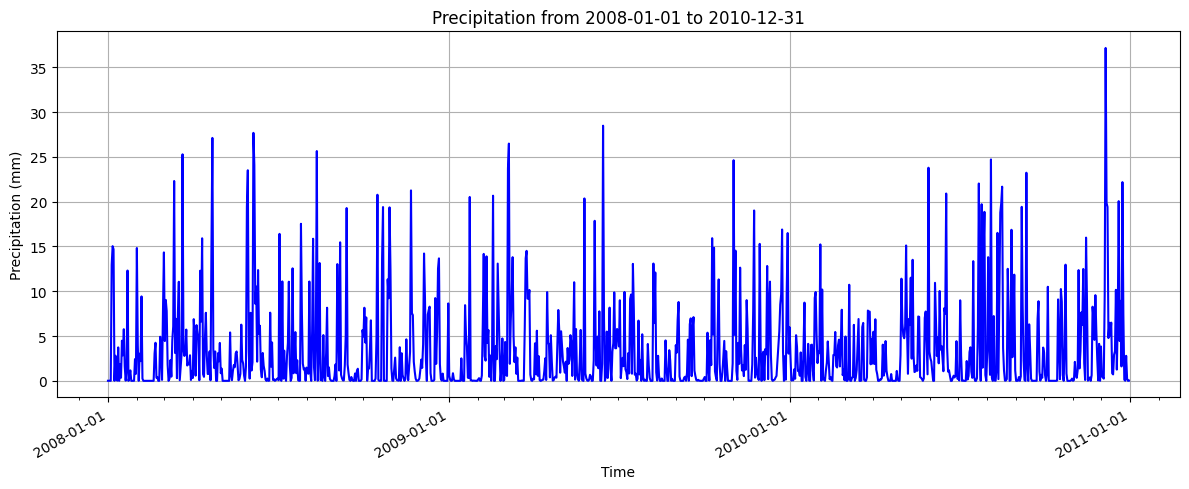

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define the 3-year period
start_date = "2008-01-01"
end_date = "2010-12-31"

# Filter the data_prepro for the specified period
time_series = pd.to_datetime(data_prepro['time'])
mask = (time_series >= start_date) & (time_series <= end_date)

data_prepro_filtered = data_prepro[mask]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(data_prepro_filtered['time'], data_prepro_filtered['tp'], color='blue')
ax.set_ylabel('Precipitation (mm)')
ax.set_title(f'Precipitation from {start_date} to {end_date}')
ax.set_xlabel('Time')
ax.grid(True)

# Apply date formatting to the x-axis
date_form = mdates.DateFormatter('%Y-%m-%d') # Format as YYYY-MM-DD
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator()) # Major ticks at each year
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # Minor ticks at each month

fig.autofmt_xdate() # Automatically format the x-axis labels for better readability

plt.tight_layout()
plt.show()

## Einfluss der Jahreszeiten untersuchen


In [ ]:
for entry in results:
    time_series = pd.to_datetime(entry['model_outputs']['time'])
    moisture_model = entry['model_outputs']['moisture']
    runoff_model = entry['model_outputs']['runoff']
    et_flux_model = entry['model_outputs']['et_flux']

    # Create a DataFrame for filtering based on time_series to get indices
    temp_df = pd.DataFrame(index=time_series)

    # Define seasonal masks (using month numbers)
    # Summer: June, July, August (months 6, 7, 8)
    summer_mask = temp_df.index.month.isin([6, 7, 8])
    # Winter: December, January, February (months 12, 1, 2)
    winter_mask = temp_df.index.month.isin([12, 1, 2])

    # Apply summer mask to data_prepro and model outputs
    data_prepro_summer = data_prepro[summer_mask]
    moisture_model_summer = moisture_model[summer_mask]
    runoff_model_summer = runoff_model[summer_mask]
    et_flux_model_summer = et_flux_model[summer_mask]

    # Calculate summer correlations
    corrs_summer = model_correlation(data_prepro_summer, (moisture_model_summer, runoff_model_summer, et_flux_model_summer))
    entry['correlations_summer'] = corrs_summer

    # Apply winter mask to data_prepro and model outputs
    data_prepro_winter = data_prepro[winter_mask]
    moisture_model_winter = moisture_model[winter_mask]
    runoff_model_winter = runoff_model[winter_mask]
    et_flux_model_winter = et_flux_model[winter_mask]

    # Calculate winter correlations
    corrs_winter = model_correlation(data_prepro_winter, (moisture_model_winter, runoff_model_winter, et_flux_model_winter))
    entry['correlations_winter'] = corrs_winter

print(results[0])

{'c_s': np.int64(25), 'correlations': {'sm': np.float64(nan), 'ro': np.float64(nan), 'et': np.float64(nan), 'sum': np.float64(nan)}, 'model_outputs': {'time': 0      2008-01-01
1      2008-01-02
2      2008-01-03
3      2008-01-04
4      2008-01-05
          ...    
4013   2018-12-27
4014   2018-12-28
4015   2018-12-29
4016   2018-12-30
4017   2018-12-31
Name: time, Length: 4018, dtype: datetime64[ns], 'moisture': array([22.5       , 22.86201894, 23.59504883, ...,         nan,
               nan,         nan]), 'runoff': array([0.00541588, 0.00174927, 0.01049979, ...,        nan,        nan,
              nan]), 'et_flux': array([-0.35918016, -0.7322779 , -0.21507739, ...,         nan,
               nan,         nan])}, 'correlations_summer': {'sm': np.float64(nan), 'ro': np.float64(nan), 'et': np.float64(nan), 'sum': np.float64(nan)}, 'correlations_winter': {'sm': np.float64(nan), 'ro': np.float64(nan), 'et': np.float64(nan), 'sum': np.float64(nan)}}


## Jahreszeiten visualisieren


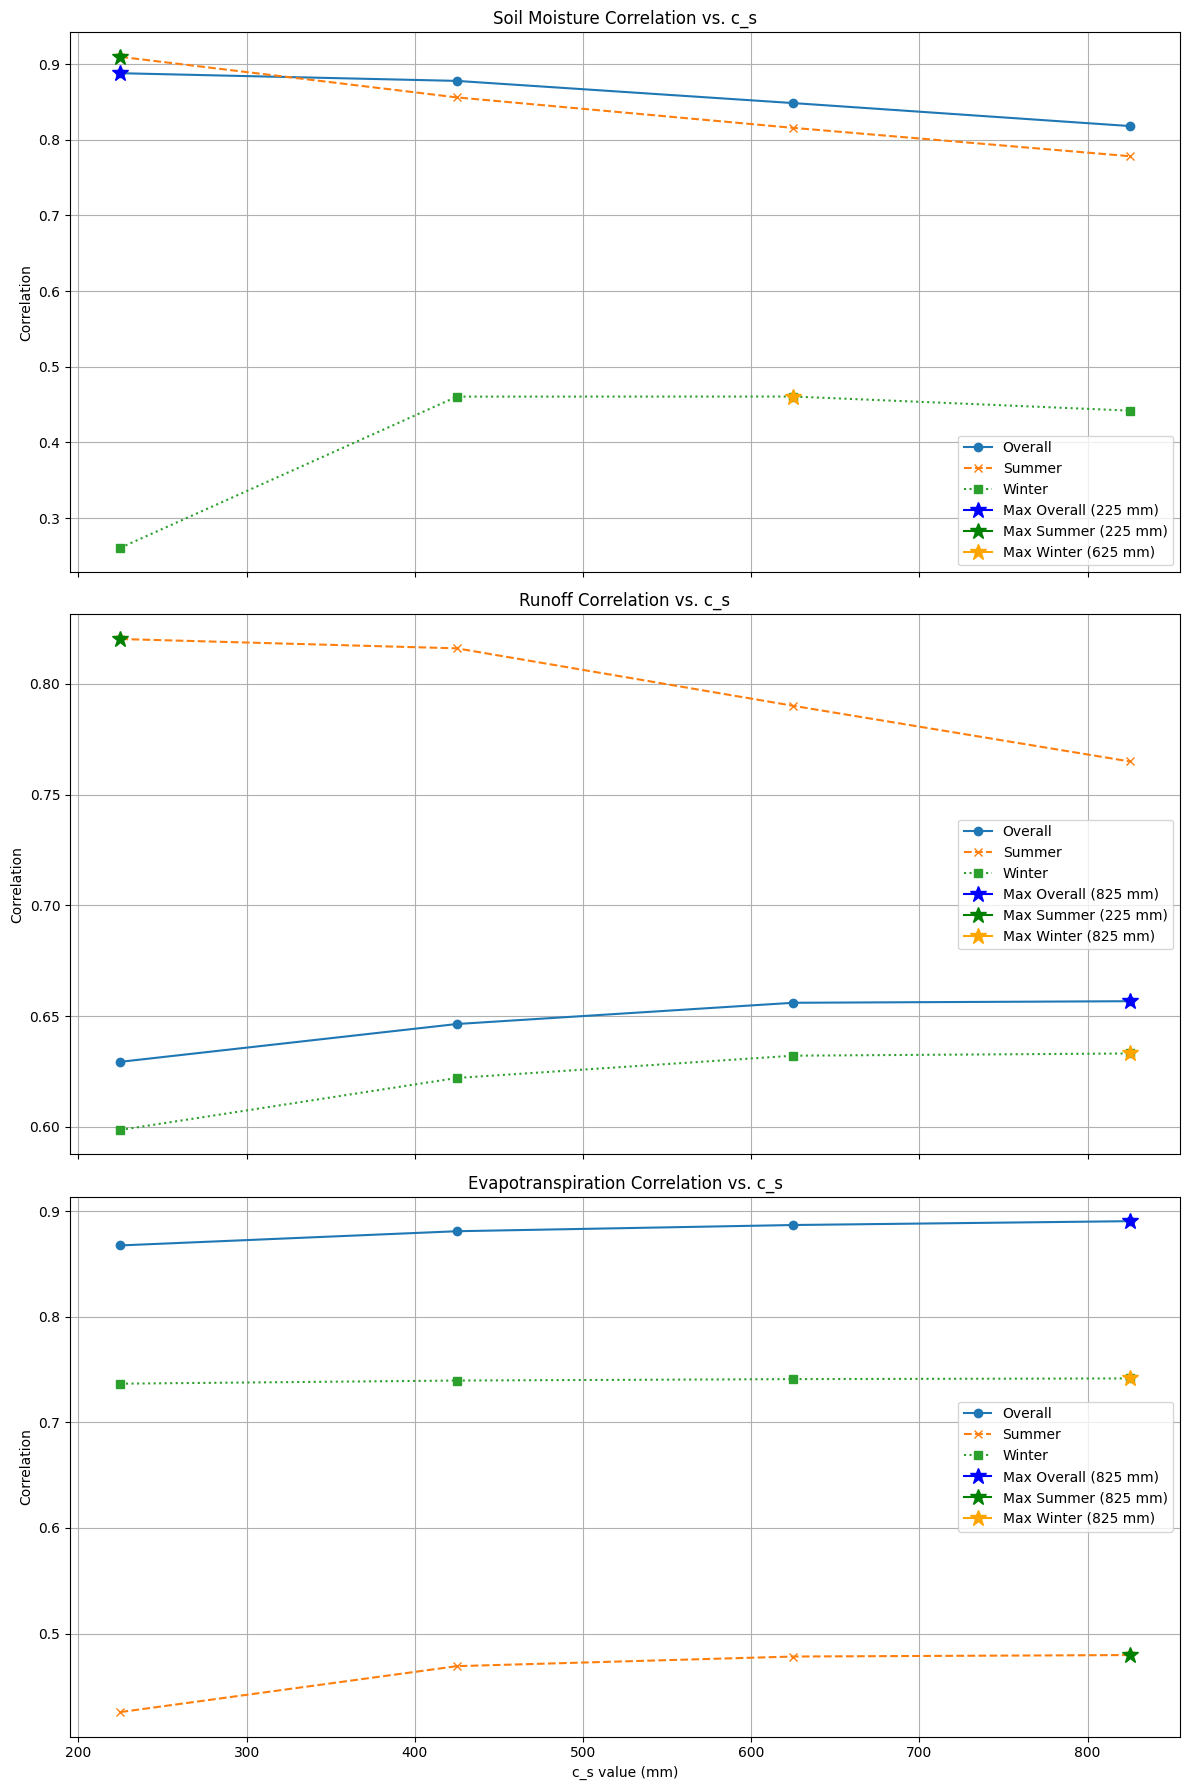

In [ ]:
c_s_values_plot = [res['c_s'] for res in results]

sm_corrs_overall = [res['correlations']['sm'] for res in results]
ro_corrs_overall = [res['correlations']['ro'] for res in results]
et_corrs_overall = [res['correlations']['et'] for res in results]

sm_corrs_summer = [res['correlations_summer']['sm'] for res in results]
ro_corrs_summer = [res['correlations_summer']['ro'] for res in results]
et_corrs_summer = [res['correlations_summer']['et'] for res in results]

sm_corrs_winter = [res['correlations_winter']['sm'] for res in results]
ro_corrs_winter = [res['correlations_winter']['ro'] for res in results]
et_corrs_winter = [res['correlations_winter']['et'] for res in results]

fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Helper function to find and plot max correlation
def plot_max_correlation(ax, c_s_vals, correlations, label, marker, linestyle, color='red'):
    if len(correlations) > 0:
        # Filter out NaN values from correlations before finding argmax
        valid_correlations = np.array(correlations)[~np.isnan(correlations)]
        valid_c_s_vals = np.array(c_s_vals)[~np.isnan(correlations)]

        if len(valid_correlations) > 0:
            max_corr_index = np.argmax(valid_correlations)
            max_corr_c_s = valid_c_s_vals[max_corr_index]
            max_corr_value = valid_correlations[max_corr_index]
            ax.plot(max_corr_c_s, max_corr_value, marker='*', markersize=12, color=color, label=f'Max {label} ({max_corr_c_s} mm)')


# Plotting Soil Moisture Correlations
axes[0].plot(c_s_values_plot, sm_corrs_overall, label='Overall', marker='o', linestyle='-')
axes[0].plot(c_s_values_plot, sm_corrs_summer, label='Summer', marker='x', linestyle='--')
axes[0].plot(c_s_values_plot, sm_corrs_winter, label='Winter', marker='s', linestyle=':')
axes[0].set_ylabel('Correlation')
axes[0].set_title('Soil Moisture Correlation vs. c_s')
plot_max_correlation(axes[0], c_s_values_plot, sm_corrs_overall, 'Overall', '*', '-', 'blue')
plot_max_correlation(axes[0], c_s_values_plot, sm_corrs_summer, 'Summer', '*', '--', 'green')
plot_max_correlation(axes[0], c_s_values_plot, sm_corrs_winter, 'Winter', '*', ':', 'orange')
axes[0].legend()
axes[0].grid(True)

# Plotting Runoff Correlations
axes[1].plot(c_s_values_plot, ro_corrs_overall, label='Overall', marker='o', linestyle='-')
axes[1].plot(c_s_values_plot, ro_corrs_summer, label='Summer', marker='x', linestyle='--')
axes[1].plot(c_s_values_plot, ro_corrs_winter, label='Winter', marker='s', linestyle=':')
axes[1].set_ylabel('Correlation')
axes[1].set_title('Runoff Correlation vs. c_s')
plot_max_correlation(axes[1], c_s_values_plot, ro_corrs_overall, 'Overall', '*', '-', 'blue')
plot_max_correlation(axes[1], c_s_values_plot, ro_corrs_summer, 'Summer', '*', '--', 'green')
plot_max_correlation(axes[1], c_s_values_plot, ro_corrs_winter, 'Winter', '*', ':', 'orange')
axes[1].legend()
axes[1].grid(True)

# Plotting Evapotranspiration Correlations
axes[2].plot(c_s_values_plot, et_corrs_overall, label='Overall', marker='o', linestyle='-')
axes[2].plot(c_s_values_plot, et_corrs_summer, label='Summer', marker='x', linestyle='--')
axes[2].plot(c_s_values_plot, et_corrs_winter, label='Winter', marker='s', linestyle=':')
axes[2].set_xlabel('c_s value (mm)')
axes[2].set_ylabel('Correlation')
axes[2].set_title('Evapotranspiration Correlation vs. c_s')
plot_max_correlation(axes[2], c_s_values_plot, et_corrs_overall, 'Overall', '*', '-', 'blue')
plot_max_correlation(axes[2], c_s_values_plot, et_corrs_summer, 'Summer', '*', '--', 'green')
plot_max_correlation(axes[2], c_s_values_plot, et_corrs_winter, 'Winter', '*', ':', 'orange')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()